# EDA & NLP

### This notebook shows the 4th part of exploratory data analysis:

3. Article types ananlysis </br>
    a. basic cleaning on the articles types</br>
    b. count vector</br>
    c. TF-IDF transformation</br>

In [114]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import seaborn as sns
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tag import pos_tag
from nltk.tokenize import word_tokenize
from nltk.corpus import wordnet
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer,TfidfTransformer 

In [72]:
# nltk.download('punkt')
# nltk.download('averaged_perceptron_tagger')
# nltk.download("maxent_treebank_pos_tagger")

[nltk_data] Downloading package maxent_treebank_pos_tagger to
[nltk_data]     /Users/jiaping/nltk_data...
[nltk_data]   Unzipping taggers/maxent_treebank_pos_tagger.zip.


True

In [167]:
train_df = pd.read_csv('../data/cleaned/train_df.csv')
valid_df = pd.read_csv('../data/cleaned/valid_df.csv')

In [305]:
train_articles_df = train_df.drop_duplicates(subset='contentID', keep='first', inplace=False)[['contentID', 'headline', 'categories']].reset_index(drop=True)
val_articles_df = valid_df.drop_duplicates(subset='contentID', keep='first', inplace=False)[['contentID', 'headline', 'categories']].reset_index(drop=True)

In [34]:
train_articles_df.head()

,contentID,headline,categories
0,www.arkansasonline.com/news/2018/jun/30/arrest...,Arrested state legislator urged to quit post,"/News/Arkansas, /News/Politics/Arkansas/Law & ..."
1,www.arkansasonline.com/news/2018/jun/30/suspec...,Suspect arrested in fatal shooting in Pulaski ...,/News/Arkansas/Crime
2,www.arkansasonline.com/news/2018/jun/30/police...,Police: Officer fatally shoots self at central...,/News/Arkansas/Law & Government/Public Safety/...
3,www.arkansasonline.com/news/2018/jun/30/motorc...,Motorcyclist killed in head-on crash in Little...,"/News/Arkansas, /News/Arkansas/Crime"
4,www.arkansasonline.com/news/2018/jun/30/early-...,The Recruiting Guy: Early offer gets highly re...,"None/Recruiting, /Sports/College/Razorbacks/Ra..."


### a. Basic cleaning on articles types

In [235]:
# data cleaning on category
def clean_category(text):
    text = re.sub(r'&', "", text) # remove "&"
    text = re.sub(r'-', "", text) # remove "-"
    text = re.sub(r"'", " ", text) # remove '
    text = re.sub(r' ', "", text) # remove space
    text = re.sub('[%s]' % re.escape(string.punctuation), ' ', text) # remove all the punctuations with space
    return text

In [306]:
train_articles_df['categories'] = train_articles_df['categories'].apply(lambda x: clean_category(x))
train_articles_df['categories']

0        News Arkansas  News Politics Arkansas LawGove...
1                                     News Arkansas Crime
2        News Arkansas LawGovernment PublicSafety Crim...
3                      News Arkansas  News Arkansas Crime
4       None Recruiting  Sports College Razorbacks Raz...
                              ...                        
8524     News World Health HealthConditions Infectious...
8525                                           News World
8526                         Entertainment Features Style
8527                         Entertainment Features Style
8528     Sports College Razorbacks RazobacksCollegeFoo...
Name: categories, Length: 8529, dtype: object

Text(0.5, 1.0, 'Article category keywords in training set')

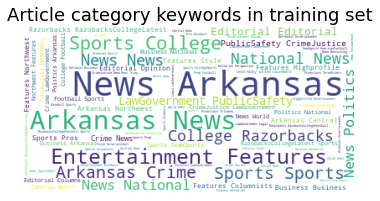

In [307]:
wordcloud1 = WordCloud(background_color='white').generate(" ".join(train_articles_df['categories']))
plt.imshow(wordcloud1)
plt.axis('off')
plt.title('Article category keywords in training set',fontsize=18)

In [308]:
tokenizer = nltk.tokenize.RegexpTokenizer(r'\w+')
types = train_articles_df['categories'].apply(lambda x:tokenizer.tokenize(x))

In [309]:
result = {x for l in types for x in l}
print(f"There are {len(result)} category keywords")
types_list = []
for i in range(0, len(types)): 
    types_list = types_list + types[i]
    
print(types_list[0])

from collections import Counter
list1= types_list
counts = Counter(list1)
counts = dict(counts)

There are 433 category keywords
News


In [310]:
type_keyword_df = pd.DataFrame({"Keyword": list(counts.keys()), 'Counts': list(counts.values())}).sort_values('Counts', ascending = False).set_index('Keyword')
type_keyword_df.head()

,Counts
Keyword,
News,8912
Arkansas,5970
Sports,3708
Entertainment,2115
Features,1965


Text(0, 0.5, 'Counts')

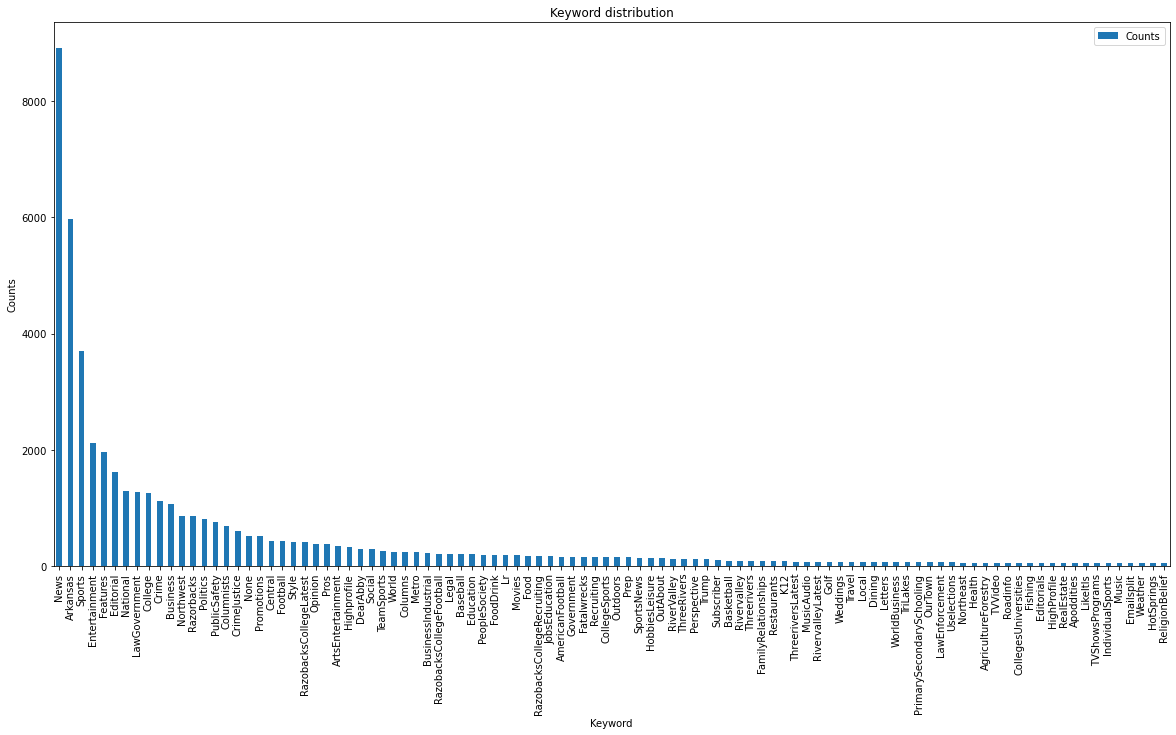

In [311]:
type_keyword_df.iloc[0:100].plot(kind = 'bar', figsize = (20,10))
plt.title('Keyword distribution')
plt.ylabel('Counts')

In [314]:
# min_df = mi, max_df = ma, optimize the parameters

tfidf = TfidfVectorizer(min_df = 2, max_df = 0.5)
train_tfidf = tfidf.fit_transform(train_articles_df['categories'])
# val_tfidf = tfidf.transform(val_articles_df['headline'])
train_tfidf.todense()

matrix([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]])

In [317]:
train_tfidf # 307
train_tfidf[0].todense()

matrix([[0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.20744798, 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0

In [191]:
vectorizer = CountVectorizer()
transformer = TfidfTransformer()
tfidf = transformer.fit_transform(vectorizer.fit_transform(train_articles_df['categories']))  
print(tfidf)

  (0, 277)	0.5911926466195692
  (0, 246)	0.34402529869096327
  (0, 197)	0.581991926018772
  (0, 196)	0.394311906905984
  (0, 24)	0.1947854372499891
  (1, 246)	0.41142717930701594
  (1, 90)	0.783369961909881
  (1, 24)	0.4658961031225571
  (2, 289)	0.5805641860279431
  (2, 246)	0.11242109458121297
  (2, 196)	0.51541530636788
  (2, 92)	0.6069986311117924
  (2, 24)	0.12730454502879357
  (3, 246)	0.5600118347811542
  (3, 90)	0.5331398504353919
  (3, 24)	0.6341519098629074
  (4, 352)	0.3740831950556592
  (4, 306)	0.33427155238792644
  (4, 300)	0.5202723809462546
  (4, 298)	0.3258307855049495
  (4, 297)	0.26985259283868557
  (4, 248)	0.25642603114129625
  (4, 73)	0.4825976688445769
  (5, 343)	0.5763846099542278
  (5, 246)	0.42273083826591995
  :	:
  (8523, 322)	0.12312618355400844
  (8523, 320)	0.3644206732371732
  (8523, 285)	0.6403331953679625
  (8523, 268)	0.23747825975028694
  (8523, 125)	0.2732492704382286
  (8523, 124)	0.3373114845149658
  (8524, 416)	0.1100534298396944
  (8524, 287)	0.

In [195]:
tfidf.shape()

TypeError: 'tuple' object is not callable

In [165]:
tfidf = transformer.fit_transform(vectorizer.fit_transform(train_articles_df['categories']))  

### Count-vector

In [105]:
count_vectorizer = CountVectorizer()
train_vector = count_vectorizer.fit_transform(train_articles_df['headline'])
val_vector = count_vectorizer.transform(val_articles_df['headline'])
print(train_vector[0].todense())

[[0 0 0 ... 0 0 0]]


In [106]:
train_vector[0].shape # 8074 features

(1, 8074)

In [115]:
val_vector[0].shape

(1, 8074)

In [110]:
train_vector.todense()

matrix([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]])

### TF-IDF

In [111]:
train_articles_df['categories']

In [150]:
vectorizer = CountVectorizer()

transformer = TfidfTransformer()
tfidf = transformer.fit_transform(vectorizer.fit_transform(train_articles_df['categories']))  
print(tfidf)

AttributeError: 'list' object has no attribute 'lower'

In [111]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf2 = TfidfVectorizer()
re = tfidf2.fit_transform(corpus)
print re

In [111]:
tfidf = TfidfVectorizer(min_df = 2, max_df = 0.5,ngram_range = (1,3))
train_tfidf = tfidf.fit_transform(train_articles_df['headline'])
val_tfidf = tfidf.transform(val_articles_df['headline'])
train_tfidf

<8529x9269 sparse matrix of type '<class 'numpy.float64'>'
	with 69193 stored elements in Compressed Sparse Row format>

In [113]:
train_tfidf.todense()[0]

matrix([[0., 0., 0., ..., 0., 0., 0.]])